
# Ordinary Least Squares and Ridge Regression Variance
Due to the few points in each dimension and the straight
line that linear regression uses to follow these points
as well as it can, noise on the observations will cause
great variance as shown in the first plot. Every line's slope
can vary quite a bit for each prediction due to the noise
induced in the observations.

Ridge regression is basically minimizing a penalised version
of the least-squared function. The penalising `shrinks` the
value of the regression coefficients.
Despite the few data points in each dimension, the slope
of the prediction is much more stable and the variance
in the line itself is greatly reduced, in comparison to that
of the standard linear regression


In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model


In [6]:
np.c_[0.5, 1].T

array([[0.5],
       [1. ]])

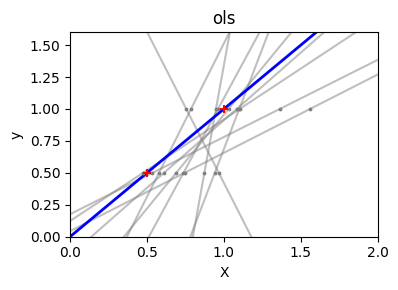

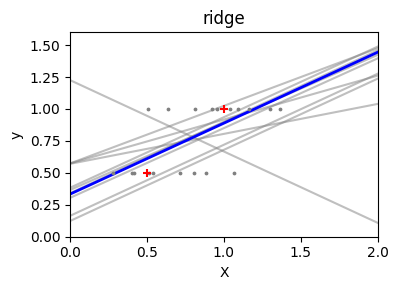

In [12]:

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(10):
        this_X = 0.25 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray",alpha = 0.5)
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

### Mathematical Explanation of Ordinary Least Squares and Ridge Regression

#### Ordinary Least Squares (OLS) Regression

**Concept**:
Ordinary Least Squares (OLS) regression aims to find the linear relationship between the input features $\ X $ and the target variable $\ y $ by minimizing the sum of squared residuals (differences between observed and predicted values).

**Mathematical Formulation**:
The OLS objective function to be minimized is:

$\
\min_{\beta} \sum_{i=1}^{n} (y_i - \vec{x}_i^T \beta)^2
$

where:
- $\ y_i $ is the target value.
- $\ \vec{x}_i $ is the feature vector for the $\ i $-th observation.
- $\ \beta $ is the vector of coefficients.

The solution to this minimization problem is given by:

$\
\hat{\beta} = (X^T X)^{-1} X^T y
$

where $\ X $ is the design matrix containing all feature vectors.

**Variance in OLS**:
Due to the few points in each dimension, the OLS regression line can vary significantly with each prediction because it tries to fit the data as closely as possible, which makes it sensitive to noise.

#### Ridge Regression

**Concept**:
Ridge regression introduces a regularization term to the OLS objective function, which penalizes large coefficients. This helps to reduce the variance of the model by shrinking the coefficients towards zero, thereby producing a more stable model.

**Mathematical Formulation**:
The Ridge regression objective function to be minimized is:

$\
\min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - \vec{x}_i^T \beta)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 \right\}
$

where:
- $\ \alpha $ is the regularization parameter controlling the strength of the penalty.
- $\ \beta_j $ are the coefficients.

The solution to this minimization problem is:

$\
\hat{\beta}_{ridge} = (X^T X + \alpha I)^{-1} X^T y
$

where $\ I $ is the identity matrix.

**Variance in Ridge Regression**:
Ridge regression mitigates the variance issue observed in OLS by adding the regularization term $\ \alpha \sum_{j=1}^{p} \beta_j^2 $. This penalization effectively shrinks the coefficients, resulting in a model that is less sensitive to noise in the data. As a consequence, the variance in the predictions is greatly reduced, leading to more stable slopes.

#### Comparison and Visualization

In the provided code:
- We have two classifiers: `ols` (Ordinary Least Squares) and `ridge` (Ridge Regression).
- For each classifier, the model is trained multiple times with noisy training data.
- The resulting prediction lines for each iteration are plotted in gray, while the final model (trained on the original data) is plotted in blue.

**Key Observations**:
- OLS shows a high variance in the prediction lines due to the sensitivity to noise.
- Ridge regression, with the
